In [130]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [131]:
matches = pd.read_csv("/content/matches.csv")
deliveries = pd.read_csv("/content/deliveries.csv")

In [132]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [133]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [134]:
matches.describe()

,season,match_number,winner_runs,winner_wickets
count,52.0,52.000000,25.000000,24.000000
mean,2024.0,27.961538,40.240000,6.416667
std,0.0,16.453096,38.411457,2.244155
min,2024.0,1.000000,1.000000,2.000000
25%,2024.0,13.750000,12.000000,5.000000
50%,2024.0,27.500000,25.000000,7.000000
75%,2024.0,42.250000,50.000000,8.000000
max,2024.0,55.000000,134.000000,10.000000


In [135]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           52 non-null     int64  
 1   team1            52 non-null     object 
 2   team2            52 non-null     object 
 3   date             52 non-null     object 
 4   match_number     52 non-null     int64  
 5   venue            52 non-null     object 
 6   city             52 non-null     object 
 7   toss_winner      52 non-null     object 
 8   toss_decision    52 non-null     object 
 9   player_of_match  51 non-null     object 
 10  umpire1          52 non-null     object 
 11  umpire2          52 non-null     object 
 12  reserve_umpire   52 non-null     object 
 13  match_referee    52 non-null     object 
 14  winner           50 non-null     object 
 15  winner_runs      25 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       5

**Dropping Insignificant Columns**

In [136]:
matches = matches.drop(['season', 'umpire1', 'umpire2', 'reserve_umpire', 'match_referee'], axis=1)
matches.head()

,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type
0,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,United States of America,NaN,7.0,Group
1,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,West Indies,NaN,5.0,Group
2,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,NaN,NaN,NaN,Group
3,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,South Africa,NaN,6.0,Group
4,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Afghanistan,125.0,NaN,Group


In [137]:
print(matches['winner'].isnull().sum())

2


In [138]:
null_win = matches.loc[matches['winner'].isnull()]
null_win

,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type
2,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,NaN,NaN,NaN,Group
10,Pakistan,United States of America,2024/06/06,11,Grand Prairie Stadium,Dallas,United States of America,field,MD Patel,NaN,NaN,NaN,Group


**Filling Super Over Results**

In [139]:
matches.loc[(matches['team1'] == 'Oman') & (matches['team2'] == 'Namibia'), 'winner'] = matches.loc[(matches['team1'] == 'Oman') & (matches['team2'] == 'Namibia'), 'winner'].fillna('Namibia')
matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'] = matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'].fillna('United States of America')

**Checking if null 'winner' data has been eliminated**

In [140]:
null_win = matches.loc[matches['winner'].isnull()]
null_win

,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type


In [141]:
print(matches['winner'].isnull().sum())

0


In [142]:
matches.head()

,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type
0,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,United States of America,NaN,7.0,Group
1,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,West Indies,NaN,5.0,Group
2,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,Namibia,NaN,NaN,Group
3,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,South Africa,NaN,6.0,Group
4,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Afghanistan,125.0,NaN,Group


In [143]:
matches.shape

(52, 13)

#**1. Match Analysis**

#**1.1 Most Wins by a Team**

In [144]:
total_wins = matches['winner'].value_counts()
total_wins

winner
South Africa                8
India                       8
Afghanistan                 5
West Indies                 5
Australia                   5
England                     4
Bangladesh                  3
United States of America    2
New Zealand                 2
Pakistan                    2
Scotland                    2
Uganda                      1
Canada                      1
Netherlands                 1
No Result                   1
Namibia                     1
Sri Lanka                   1
Name: count, dtype: int64

In [145]:
max_wins = max(total_wins)
print("Max no. of wins = ", max_wins)

Max no. of wins =  8


In [146]:
teams_with_most_wins = total_wins[total_wins == max_wins].index.tolist()
print(f"Team(s) with Most Wins = {teams_with_most_wins} ({max_wins} wins)")

Team(s) with Most Wins = ['South Africa', 'India'] (8 wins)


#**1.2 Win Percentage of Each Team**

In [147]:
teams = pd.concat([matches['team1'], matches['team2']])
tot_matches = teams.value_counts()

In [148]:
team_wins = matches['winner'].value_counts()
win_percnt = (team_wins / tot_matches) * 100
win_percnt = win_percnt[win_percnt > 0].sort_values(ascending = False)
win_percnt

India                       100.000000
South Africa                 88.888889
Australia                    71.428571
West Indies                  71.428571
Afghanistan                  62.500000
England                      50.000000
New Zealand                  50.000000
Pakistan                     50.000000
Scotland                     50.000000
Bangladesh                   42.857143
Canada                       33.333333
Sri Lanka                    33.333333
United States of America     33.333333
Namibia                      25.000000
Netherlands                  25.000000
Uganda                       25.000000
Name: count, dtype: float64

In [149]:
country_colors = {
    'India': 'blue',
    'South Africa': 'darkgreen',
    'Australia': 'yellow',
    'West Indies': 'red',
    'Afghanistan': 'blue',
    'England': 'red',
    'New Zealand': 'Black',
    'Pakistan': 'darkgreen',
    'Scotland': 'purple',
    'Bangladesh': 'darkgreen',
    'Canada': 'red',
    'Sri Lanka': 'darkblue',
    'United States of America': 'pink',
    'Namibia': 'gray',
    'Netherlands': 'orange',
    'Uganda': 'yellow'
}

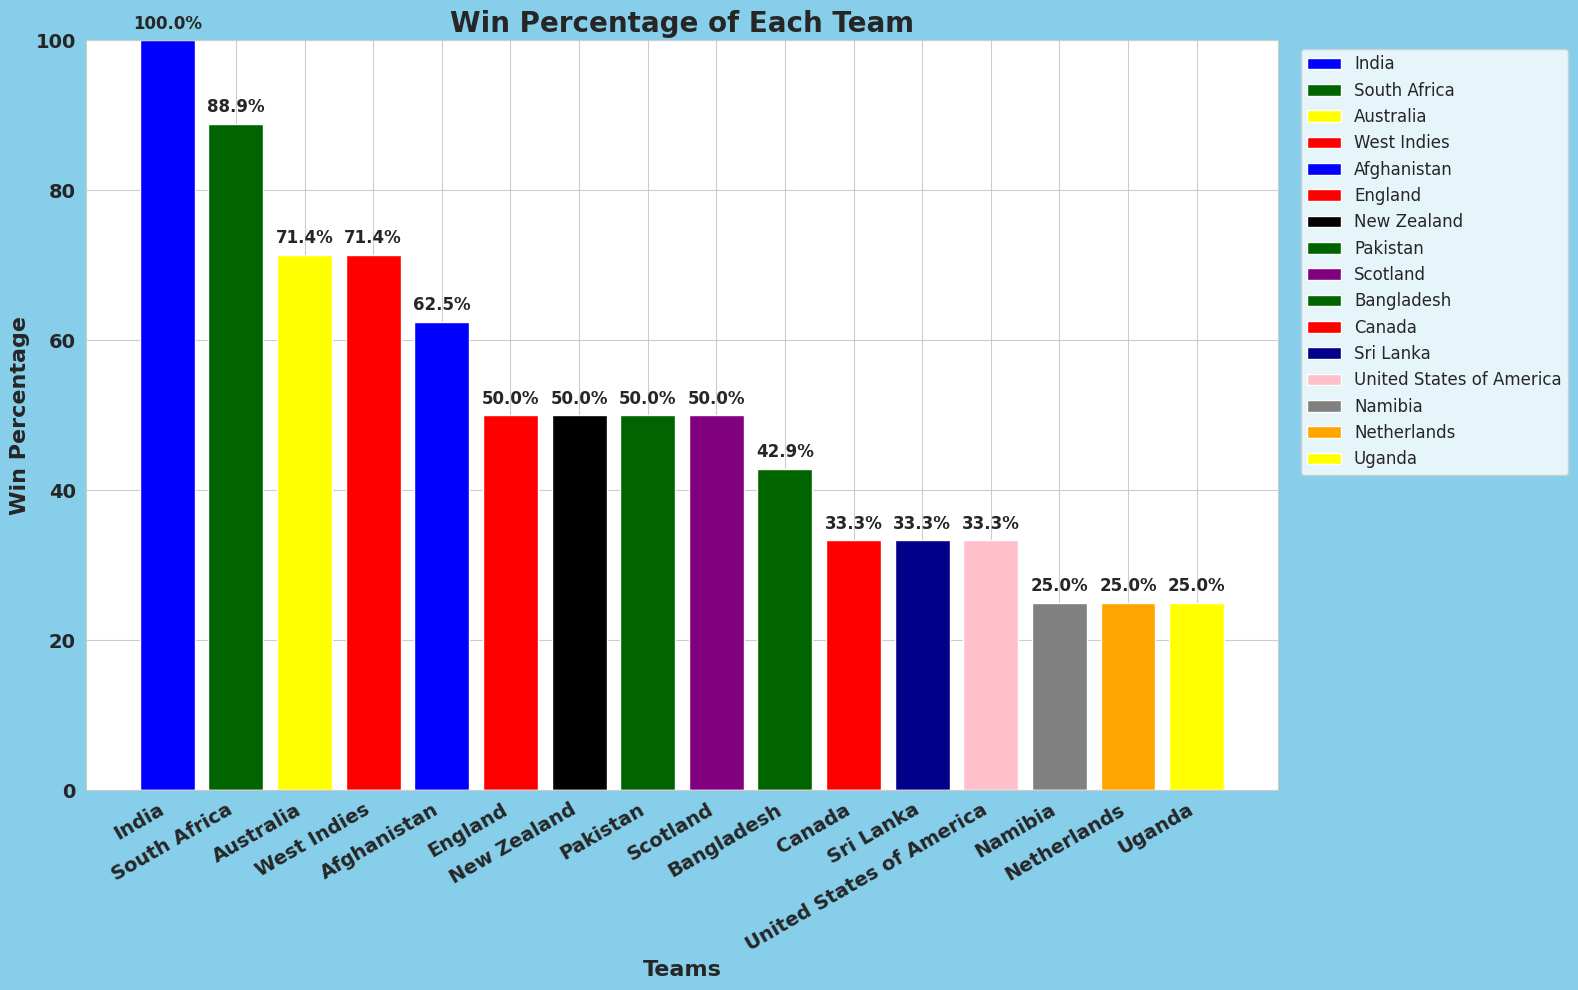

In [150]:
colors = [country_colors.get(team, 'gray') for team in win_percnt.index]
plt.figure(figsize=(16,10), facecolor = 'skyblue')

bars = plt.bar(win_percnt.index, win_percnt, color = colors)
plt.xlabel('Teams', fontsize=16, weight='bold')
plt.ylabel('Win Percentage', fontsize=16, weight='bold')
plt.title('Win Percentage of Each Team', fontsize=20, weight='bold')
plt.xticks(rotation=30, ha='right', fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.ylim(0, 100)   # max win percentage can only be 100

for bar, percentage in zip(bars, win_percnt):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=12, weight='bold')

legend_handles = []
for team, color in country_colors.items():
    if team in win_percnt.index:
        legend_handles.append(plt.bar([team], [0], color=color))

plt.legend(legend_handles, country_colors.keys(), loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=12)

plt.tight_layout()
plt.show()

#**1.3 Match Result based on Toss Outcome**

In [151]:
toss_match_res = matches[matches['toss_winner'] == matches['winner']]
# toss_match_res.shape
toss_win_match_win = toss_match_res.shape[0]
tot_matches = matches.shape[0]

print(f"Toss Winner also won the Match on {toss_win_match_win} out of {tot_matches} i.e. {round((toss_win_match_win / tot_matches) * 100, 2)} % occasions.")

Toss Winner also won the Match on 28 out of 52 i.e. 53.85 % occasions.


#**1.4 Most Wins at a Single Venue**

In [152]:
ven_wins = matches['venue'].value_counts()
ven_wins

venue
Kensington Oval                                      9
Nassau County International Cricket Stadium          8
Sir Vivian Richards Stadium                          8
Providence Stadium                                   6
Daren Sammy National Cricket Stadium                 6
Brian Lara Stadium                                   5
Arnos Vale Ground                                    5
Grand Prairie Stadium                                4
Central Broward Regional Park Stadium Turf Ground    1
Name: count, dtype: int64

In [153]:
max_ven_wins = max(ven_wins)
ven_with_most_wins = ven_wins[ven_wins == max_ven_wins].index.tolist()
str_ven_wins = ' '.join(str(i) for i in ven_with_most_wins)
print(f"Maximum wins at a single venue came at {str_ven_wins} ({max_ven_wins} wins)")

Maximum wins at a single venue came at Kensington Oval (9 wins)


#**1.5 Most Common Venue for Winning**

In [154]:
venue_wins = matches.groupby('venue')['winner'].value_counts().sort_values(ascending=False)
most_common_venue = venue_wins.idxmax()[0]
print(f"The Most Common Venue for Winning is {most_common_venue}")

The Most Common Venue for Winning is Nassau County International Cricket Stadium


#**1.6 Win Percentage based on Toss Decision**

In [155]:
chose_to_bat = matches[(matches['toss_decision'] == 'bat') & (matches['winner'] == matches['toss_winner'])]
chose_to_field = matches[(matches['toss_decision'] == 'field') & (matches['winner'] == matches['toss_winner'])]

bat_win_perc = (chose_to_bat.shape[0] / matches.shape[0]) * 100
field_win_perc = (chose_to_field.shape[0] / matches.shape[0]) * 100

print(f"Percentage of Teams Winning after Choosing to Bat: {bat_win_perc:.2f}%")
print(f"Percentage of Teams Winning after Choosing to Field: {field_win_perc:.2f}%")

Percentage of Teams Winning after Choosing to Bat: 9.62%
Percentage of Teams Winning after Choosing to Field: 44.23%


#**1.7 Team Performance based on Batting or Bowling First**

In [156]:
batting_first = matches[matches['toss_decision'] == 'bat']
chasing_target = matches[matches['toss_decision'] == 'field']

batting_first_win_percentage = (batting_first[batting_first['winner'] == batting_first['team1']].shape[0] / batting_first.shape[0]) * 100
chasing_win_percentage = (chasing_target[chasing_target['winner'] == chasing_target['team2']].shape[0] / chasing_target.shape[0]) * 100

print(f"Win percentage batting first: {batting_first_win_percentage:.2f}%")
print(f"Win percentage chasing target: {chasing_win_percentage:.2f}%")

Win percentage batting first: 50.00%
Win percentage chasing target: 54.76%


In [157]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
deliveries.describe()

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,11472.000000,11472.0,11472.000000,11472.000000,11472.000000,11472.000000,408.000000,45.0,41.000000,179.000000,1.0,0.0,0.0
mean,26.879794,2024.0,1.465394,9.108439,1.062413,0.076360,1.245098,1.0,2.073171,1.301676,5.0,NaN,NaN
std,16.343629,0.0,0.508687,5.612894,1.566343,0.375929,0.857816,0.0,1.311302,0.866705,NaN,NaN,NaN
min,0.000000,2024.0,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
25%,12.000000,2024.0,1.000000,4.300000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
50%,26.000000,2024.0,1.000000,8.700000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
75%,42.000000,2024.0,2.000000,13.600000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN
max,54.000000,2024.0,4.000000,19.800000,6.000000,5.000000,5.000000,1.0,4.000000,5.000000,5.0,NaN,NaN


In [159]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11472 entries, 0 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                11472 non-null  int64  
 1   season                  11472 non-null  int64  
 2   start_date              11472 non-null  object 
 3   venue                   11472 non-null  object 
 4   innings                 11472 non-null  int64  
 5   ball                    11472 non-null  float64
 6   batting_team            11472 non-null  object 
 7   bowling_team            11472 non-null  object 
 8   striker                 11472 non-null  object 
 9   non_striker             11472 non-null  object 
 10  bowler                  11472 non-null  object 
 11  runs_off_bat            11472 non-null  int64  
 12  extras                  11472 non-null  int64  
 13  wides                   408 non-null    float64
 14  noballs                 45 non-null   

**Dropping Insignificant Columns**

In [160]:
deliveries = deliveries.drop(['season', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'other_wicket_type', 'other_player_dismissed'], axis=1)
deliveries.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed
0,1,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,0,0,NaN,NaN
1,1,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,1,0,NaN,NaN
2,1,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN
3,1,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN
4,1,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN


In [161]:
deliveries.shape

(11472, 14)

#**2. Player Analysis**

#**2.1 Top Run Scorers**

In [162]:
top_run_scorers = deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
top_run_scorers

striker
Rahmanullah Gurbaz    281
RG Sharma             257
TM Head               255
Q de Kock             243
Ibrahim Zadran        231
N Pooran              228
AGS Gous              219
JC Buttler            214
SA Yadav              199
H Klaasen             190
Name: runs_off_bat, dtype: int64

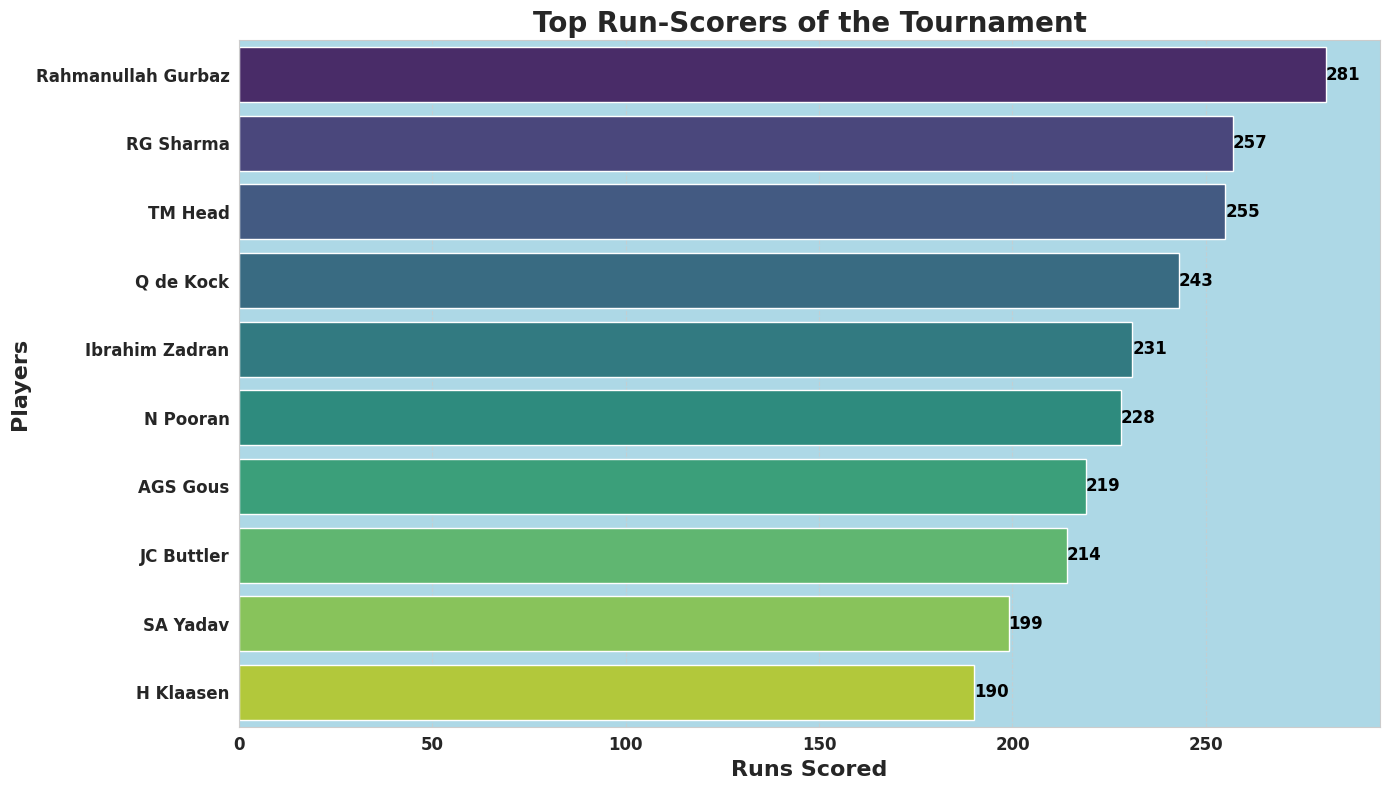

In [163]:
plt.figure(figsize=(14,8))
sns.set_style(style='whitegrid')

barplot = sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette='viridis')
plt.title('Top Run-Scorers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_run_scorers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

#**2.2 Top Wicket Takers**

In [164]:
top_wicket_takers = deliveries[deliveries['wicket_type'].notnull()].groupby('bowler').size().sort_values(ascending=False).head(10)
top_wicket_takers

bowler
Arshdeep Singh      18
Fazalhaq Farooqi    17
Naveen-ul-Haq       16
A Nortje            16
JJ Bumrah           15
K Rabada            15
Rishad Hossain      14
AS Joseph           14
Rashid Khan         14
A Zampa             13
dtype: int64

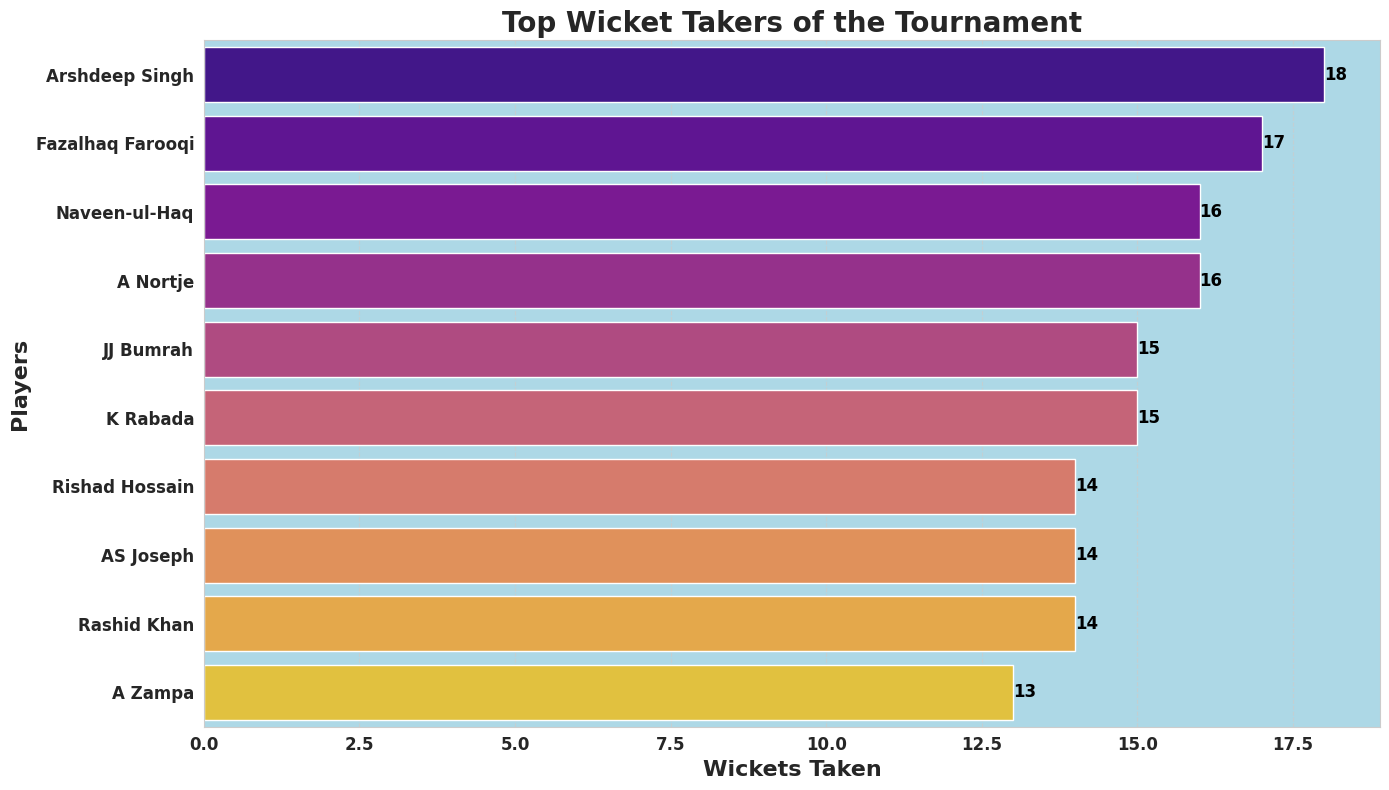

In [165]:
plt.figure(figsize=(14,8))
sns.set_style(style='whitegrid')

barplot = sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='plasma')
plt.title('Top Wicket Takers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Wickets Taken', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_wicket_takers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

#**2.3 Highest Batting Strike Rate (Minimum 150 runs)**

In [166]:
balls_faced = deliveries.groupby('striker').size()
runs_scored = deliveries.groupby('striker')['runs_off_bat'].sum()

strike_rate = (runs_scored / balls_faced) * 100
filt_strike_rate = strike_rate[runs_scored >= 150]

top_strike_rates = filt_strike_rate.sort_values(ascending=False).head(10)
top_strike_rates

striker
MP Stoinis    159.433962
TM Head       154.545455
JC Buttler    152.857143
RG Sharma     152.071006
PD Salt       150.400000
AGS Gous      143.137255
N Pooran      139.877301
DA Warner     136.923077
Q de Kock     135.000000
SA Yadav      134.459459
dtype: float64

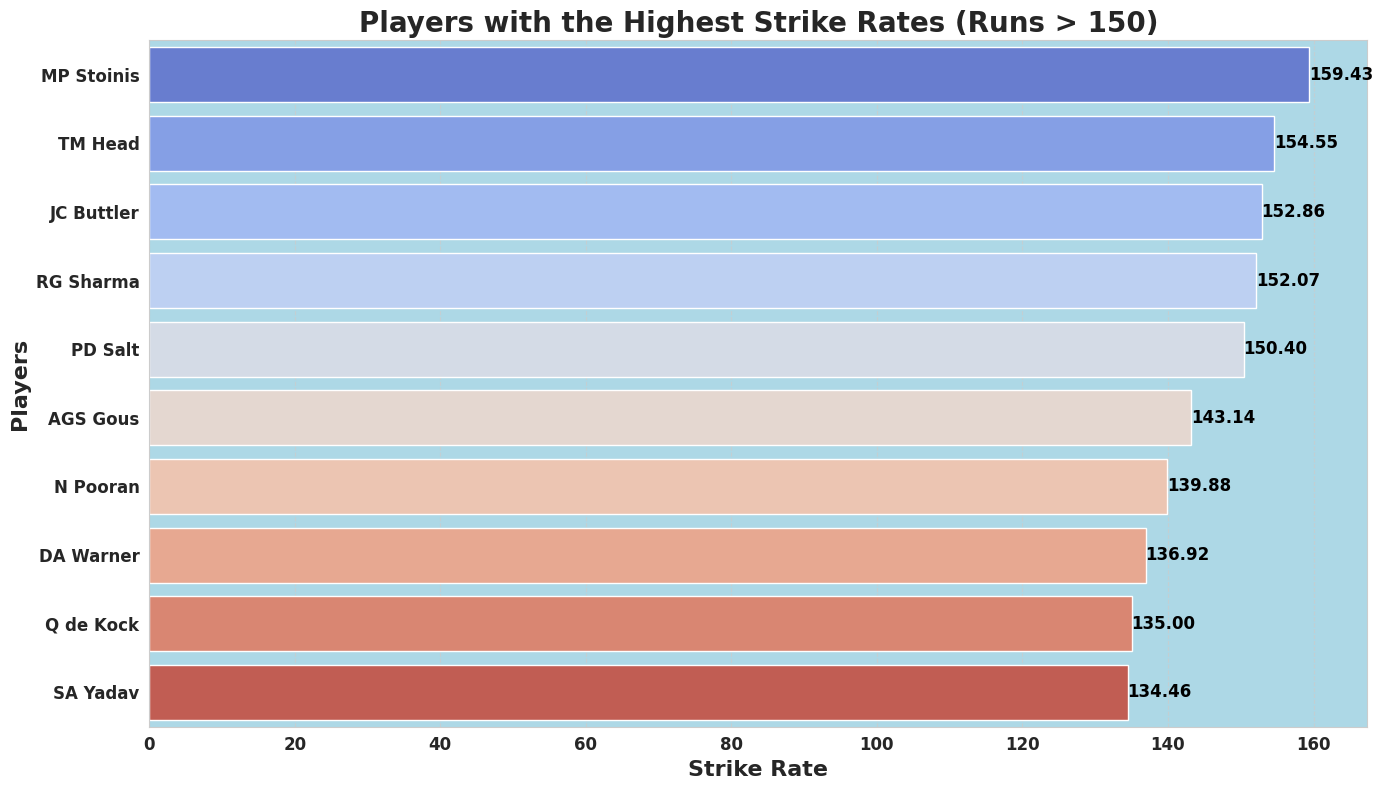

In [167]:
plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_strike_rates.values, y=top_strike_rates.index, palette='coolwarm')
plt.title('Players with the Highest Strike Rates (Runs > 150)', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_strike_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

#**2.4 Best Bowling Economy Rate (Minimum 150 balls)**

In [168]:
balls_bowled = deliveries.groupby('bowler').size()
runs_conceded = deliveries.groupby('bowler')['runs_off_bat'].sum() + deliveries.groupby('bowler')['extras'].sum()

economy_rate = (runs_conceded / (balls_bowled / 6))

filt_economy_rate= economy_rate[balls_bowled >= 150]

best_economy = filt_economy_rate.sort_values().head(10)
best_economy

bowler
JJ Bumrah            4.625698
Mustafizur Rahman    5.403727
A Nortje             5.598214
AJ Hosein            5.605263
Naveen-ul-Haq        5.892857
KA Maharaj           6.175439
K Rabada             6.185567
Rashid Khan          6.232044
Fazalhaq Farooqi     6.439024
M Jansen             6.439024
dtype: float64

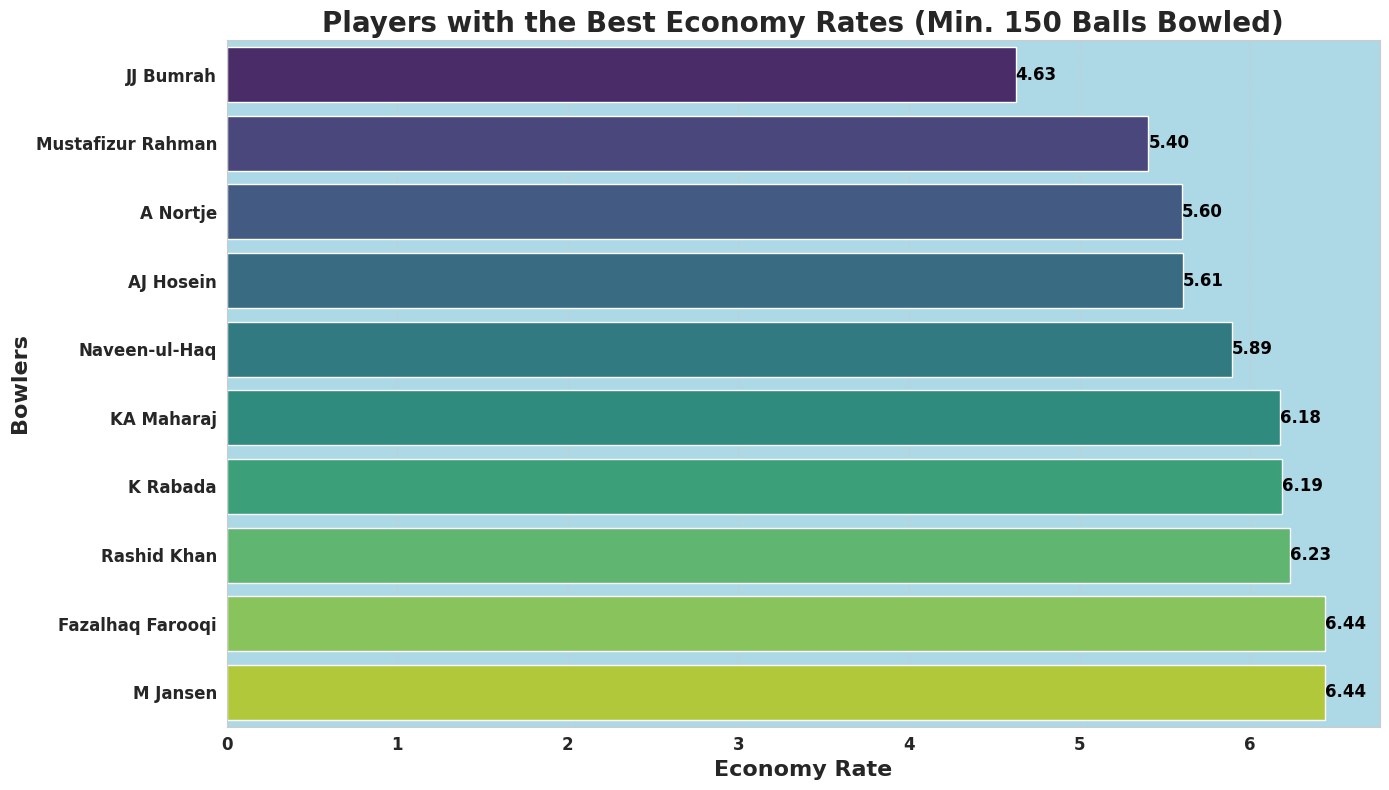

In [169]:
plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=best_economy.values, y=best_economy.index, palette='viridis')
plt.title('Players with the Best Economy Rates (Min. 150 Balls Bowled)', fontsize=20, weight='bold')
plt.xlabel('Economy Rate', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(best_economy.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

#**2.5 Most Consistent Batters**

In [170]:
consistent_batsmen = deliveries.groupby(['match_id', 'striker'])['runs_off_bat'].sum().groupby('striker').mean().sort_values(ascending=False).head(10)
consistent_batsmen = consistent_batsmen.reset_index().rename(columns={"striker": "Batsman", "runs_off_bat": "Striking Rate"})
pd.DataFrame(consistent_batsmen)

,Batsman,Striking Rate
0,BJ McMullen,46.666667
1,AGS Gous,36.500000
2,TM Head,36.428571
3,HC Brook,36.250000
4,SD Hope,35.666667
5,Rahmanullah Gurbaz,35.125000
6,KR Mayers,35.000000
7,RD Berrington,34.000000
8,MP Stoinis,33.800000
9,NR Kirton,33.666667


#**2.6 Most Consistent Bowlers**

In [171]:
consistent_bowlers = deliveries[deliveries['wicket_type'].notnull()].groupby(['match_id', 'bowler']).size().groupby('bowler').mean().sort_values(ascending=False).head(10)
consistent_bowlers = consistent_bowlers.reset_index().rename(columns={"bowler": "Bowler", 0: 'Consistency in Economy'})
consistent_bowlers

,Bowler,Consistency in Economy
0,K Bhurtel,4.000000
1,Imad Wasim,3.000000
2,J Miyaji,3.000000
3,NP Kenjige,3.000000
4,OC McCoy,3.000000
5,S Lamichhane,3.000000
6,Fazalhaq Farooqi,2.833333
7,Rashid Khan,2.800000
8,CJ Jordan,2.750000
9,T Shamsi,2.750000


#**2.7 Top Batters (Powerplay, Middle Overs, Death Overs)**

In [172]:
deliveries.head(20)

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed
0,1,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,0,0,NaN,NaN
1,1,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,1,0,NaN,NaN
2,1,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN
3,1,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN
4,1,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN
5,1,2024-06-02,"Providence Stadium, Guyana",1,0.6,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN
6,1,2024-06-02,"Providence Stadium, Guyana",1,1.1,Papua New Guinea,West Indies,TP Ura,A Vala,R Shepherd,1,0,NaN,NaN
7,1,2024-06-02,"Providence Stadium, Guyana",1,1.2,Papua New Guinea,West Indies,A Vala,TP Ura,R Shepherd,0,0,NaN,NaN
8,1,2024-06-02,"Providence Stadium, Guyana",1,1.3,Papua New Guinea,West Indies,A Vala,TP Ura,R Shepherd,3,0,NaN,NaN
9,1,2024-06-02,"Providence Stadium, Guyana",1,1.4,Papua New Guinea,West Indies,TP Ura,A Vala,R Shepherd,0,0,NaN,NaN


In [173]:
powerplay = deliveries[deliveries['ball'].between(0.1, 6.6)]
middle = deliveries[deliveries['ball'].between(7.1, 15.6)]
death = deliveries[deliveries['ball'].between(16.1, 20.6)]

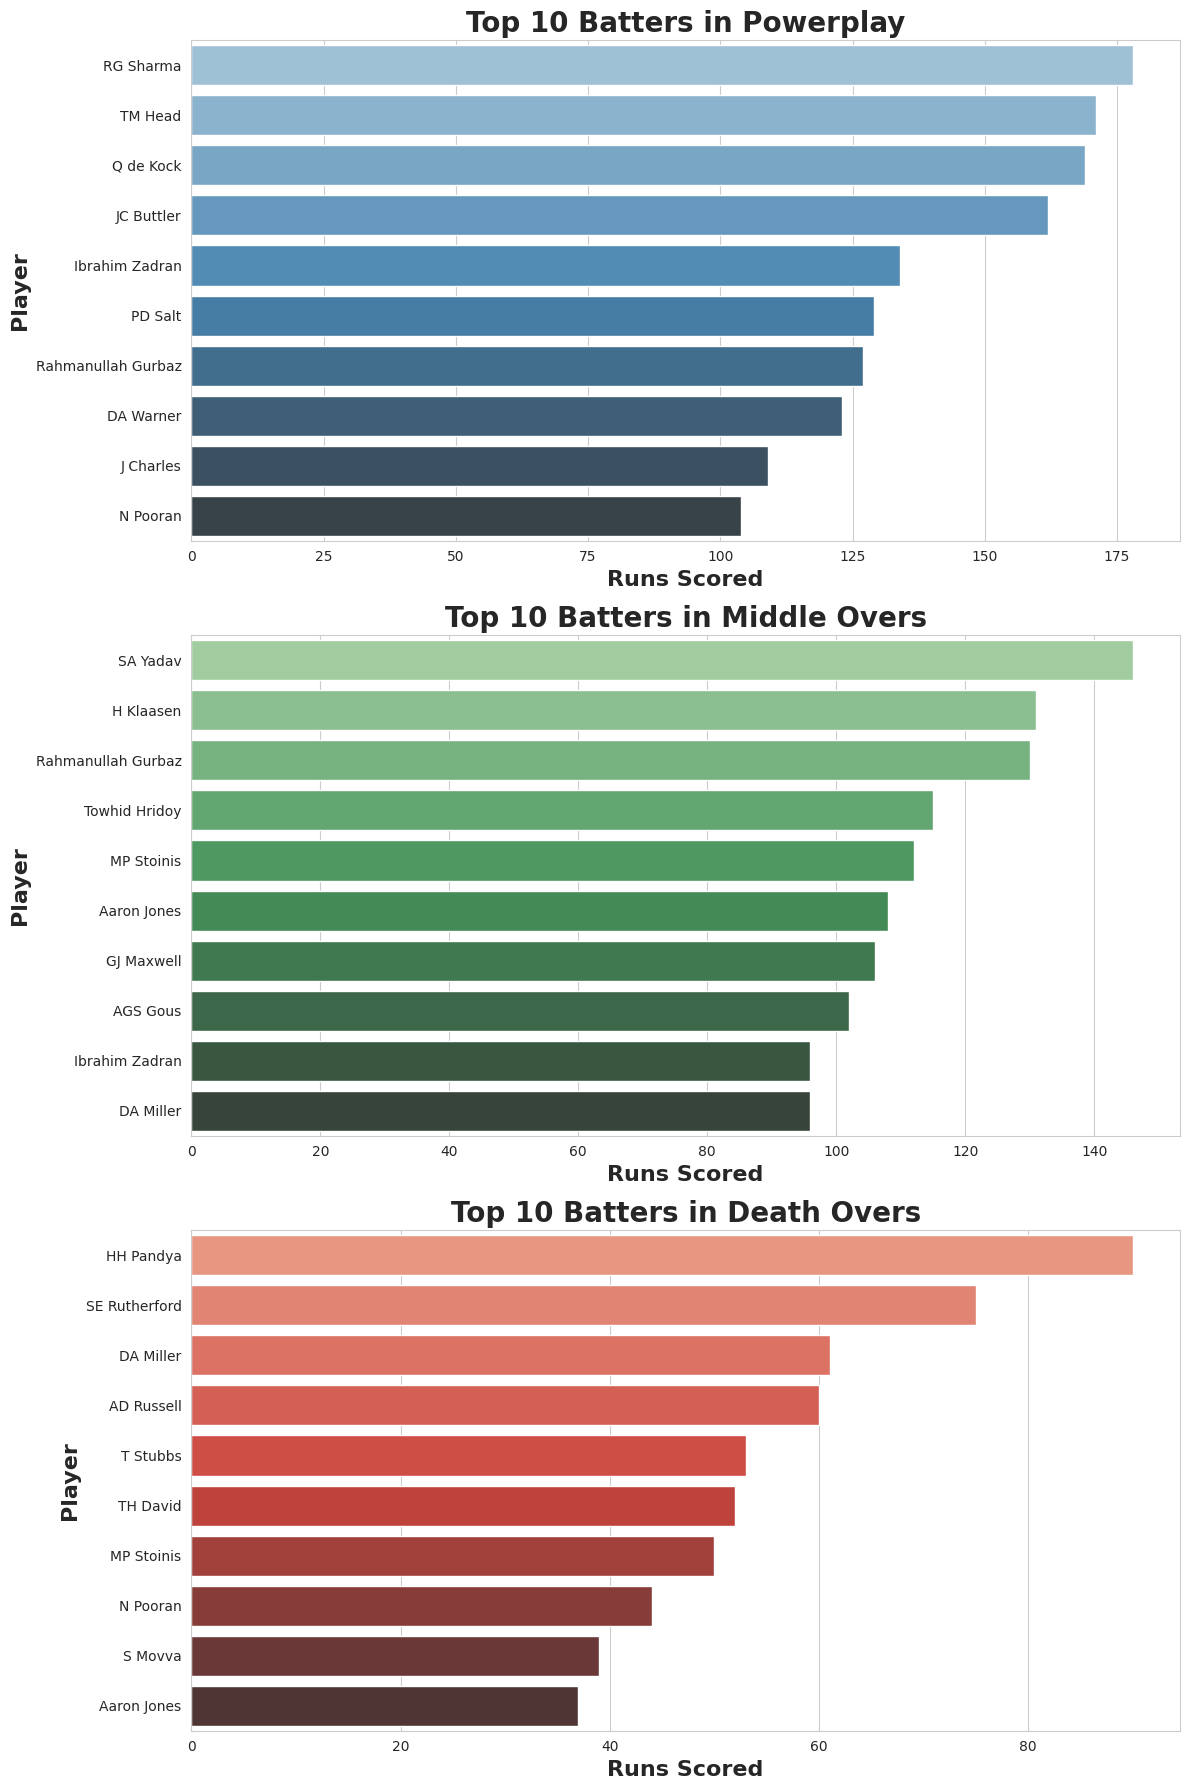

In [174]:
pp_bat_perf = powerplay.groupby('striker')['runs_off_bat'].sum().sort_values(ascending = False)
mo_bat_perf = middle.groupby('striker')['runs_off_bat'].sum().sort_values(ascending = False)
dt_bat_perf = death.groupby('striker')['runs_off_bat'].sum().sort_values(ascending = False)
sns.set_style(style = 'whitegrid')

top10_bat_pp = pp_bat_perf.head(10).sort_values(ascending=False)
top10_bat_mo = mo_bat_perf.head(10).sort_values(ascending=False)
top10_bat_dt = dt_bat_perf.head(10).sort_values(ascending=False)

fig, axes = plt.subplots(3,1,figsize=(12,18))

sns.barplot(x=top10_bat_pp.values, y=top10_bat_pp.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Batters in Powerplay', fontsize=20, weight='bold')
axes[0].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[0].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_bat_mo.values, y=top10_bat_mo.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Batters in Middle Overs', fontsize=20, weight='bold')
axes[1].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[1].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_bat_dt.values, y=top10_bat_dt.index, ax=axes[2], palette="Reds_d")
axes[2].set_title('Top 10 Batters in Death Overs', fontsize=20, weight='bold')
axes[2].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[2].set_ylabel('Player', fontsize=16, weight='bold')

plt.tight_layout()

plt.show()

#**2.8 Most Player of the Match Awards by a Player**

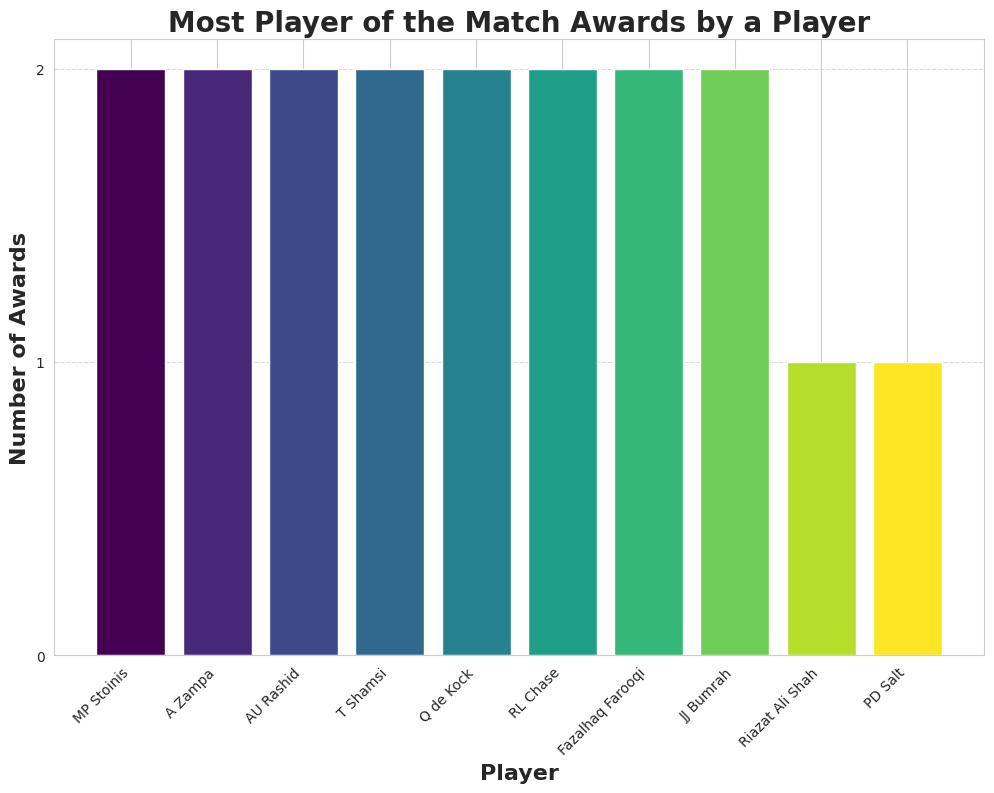

In [175]:
potm = matches.groupby('player_of_match')['player_of_match'].count().sort_values(ascending=False).head(10)

colors = plt.cm.viridis(np.linspace(0, 1, len(potm)))

plt.figure(figsize=(12, 8))
bars = plt.bar(potm.index, potm.values, color=colors)
plt.title('Most Player of the Match Awards by a Player', fontsize=20, weight = 'bold')
plt.xlabel('Player', fontsize=16, weight = 'bold')
plt.ylabel('Number of Awards', fontsize=16, weight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to display only integer values
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

#**3. Batting Analysis**


#**3.1 Best Team Run Rate**

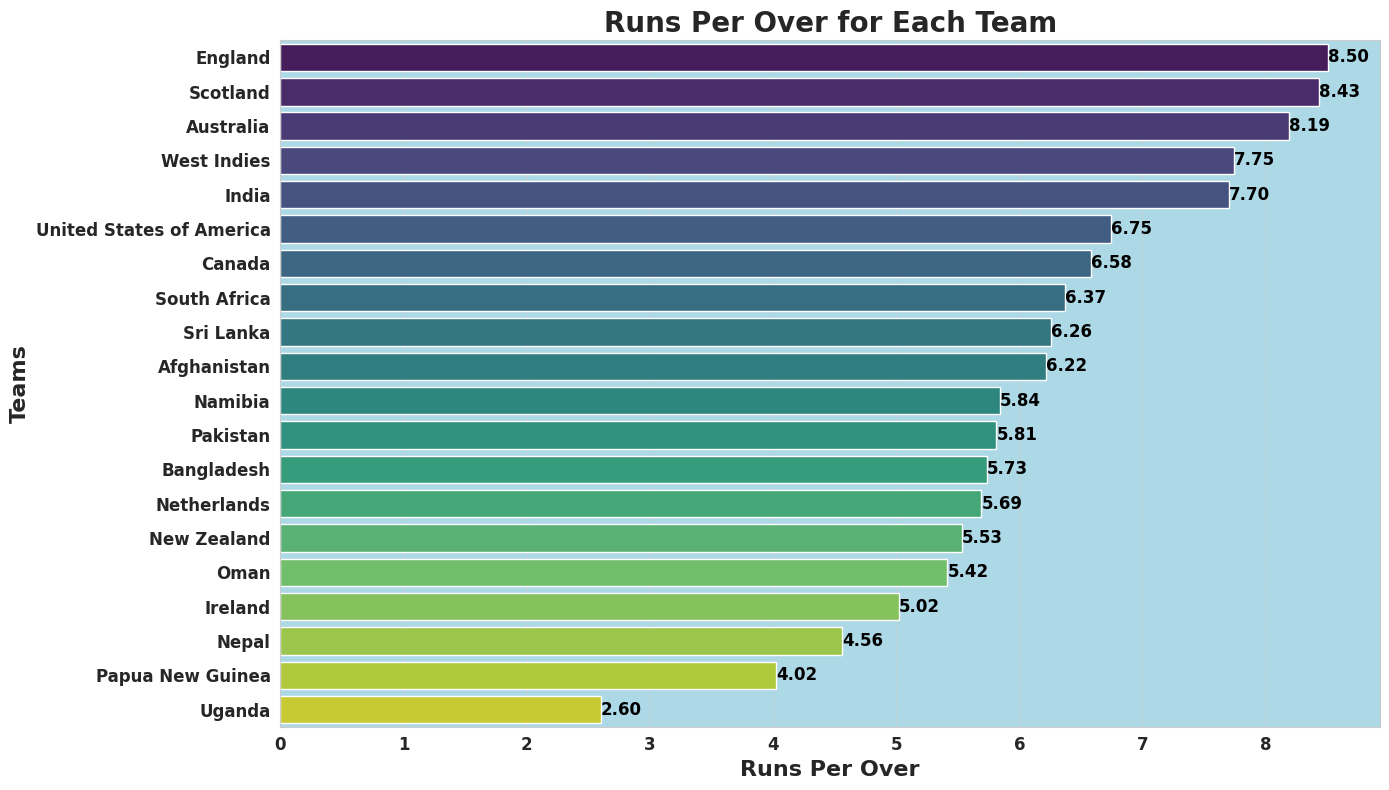

In [176]:
team_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()
team_balls = deliveries.groupby('batting_team').size()

runs_per_over = team_runs / (team_balls / 6)
most_runs_per_over = runs_per_over.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=most_runs_per_over.values, y=most_runs_per_over.index, palette='viridis')
plt.title('Runs Per Over for Each Team', fontsize=20, weight='bold')
plt.xlabel('Runs Per Over', fontsize=16, weight='bold')
plt.ylabel('Teams', fontsize=16, weight='bold')

for index, value in enumerate(most_runs_per_over.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

#**3.2 Batting Partnerships**

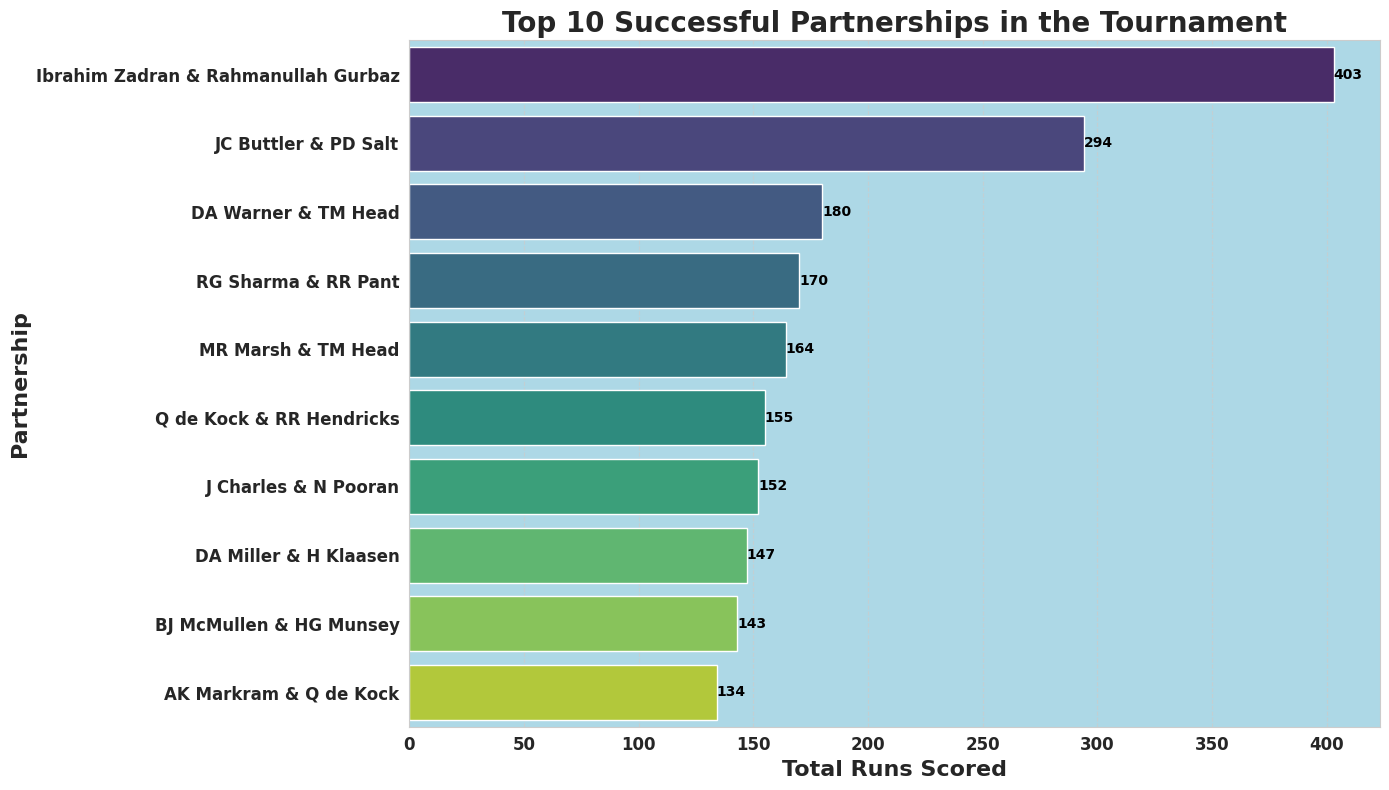

In [177]:
# Sort the players within each partnership and combine runs
deliveries['partnership'] = deliveries.apply(lambda x: tuple(sorted([x['striker'], x['non_striker']])), axis=1)
partnerships = deliveries.groupby(['match_id', 'partnership'])['runs_off_bat'].sum().reset_index()

# Aggregate the total runs for each partnership
successful_partnerships = partnerships.groupby('partnership')['runs_off_bat'].sum().sort_values(ascending=False).reset_index()

# Separate the partnership tuple into two columns
successful_partnerships[['striker', 'non_striker']] = pd.DataFrame(successful_partnerships['partnership'].tolist(), index=successful_partnerships.index)
top_part = successful_partnerships.head(10)
top_part['partnership'] = top_part['striker'] + ' & ' + top_part['non_striker']

# Plotting
plt.figure(figsize=(14,8))
sns.set_style(style='whitegrid')

barplot = sns.barplot(data=top_part, x='runs_off_bat', y='partnership', palette='viridis')
plt.title('Top 10 Successful Partnerships in the Tournament', fontsize=20, weight='bold')
plt.xlabel('Total Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Partnership', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(top_part['runs_off_bat']):
    plt.text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

#**3.3 Boundary Percentage per Team**

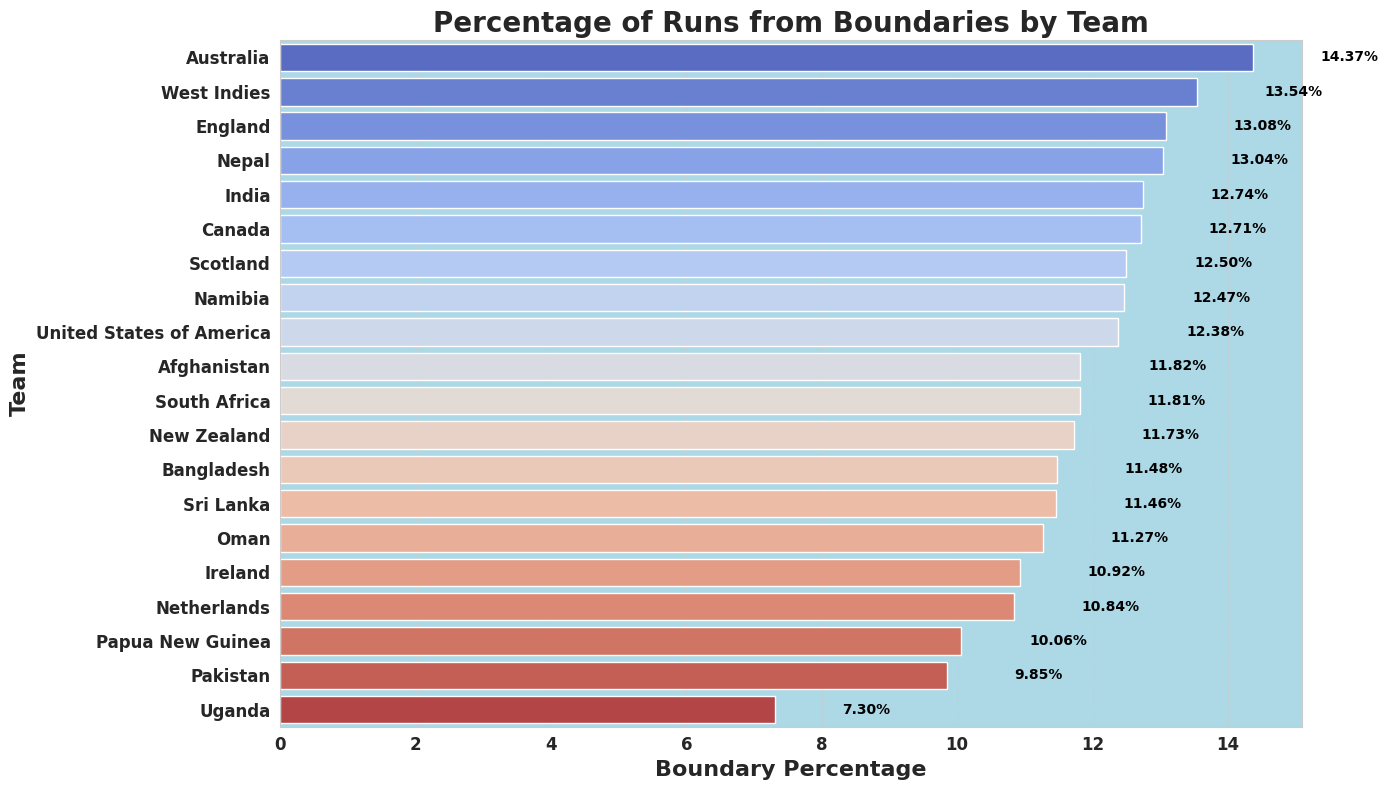

In [178]:
boundaries = deliveries[deliveries['runs_off_bat'].isin([4, 6])]
team_boundaries = boundaries.groupby('batting_team').size()
team_total_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()

boundary_percentage = (team_boundaries / team_total_runs) * 100

boundary_percentage = boundary_percentage.reset_index()
boundary_percentage.columns = ['batting_team', 'boundary_percentage']
boundary_percentage = boundary_percentage.sort_values(by='boundary_percentage', ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=boundary_percentage, x='boundary_percentage', y='batting_team', palette='coolwarm')
plt.title('Percentage of Runs from Boundaries by Team', fontsize=20, weight='bold')
plt.xlabel('Boundary Percentage', fontsize=16, weight='bold')
plt.ylabel('Team', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(boundary_percentage['boundary_percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

#**3.4 Dot Ball Percentage (Batting)**

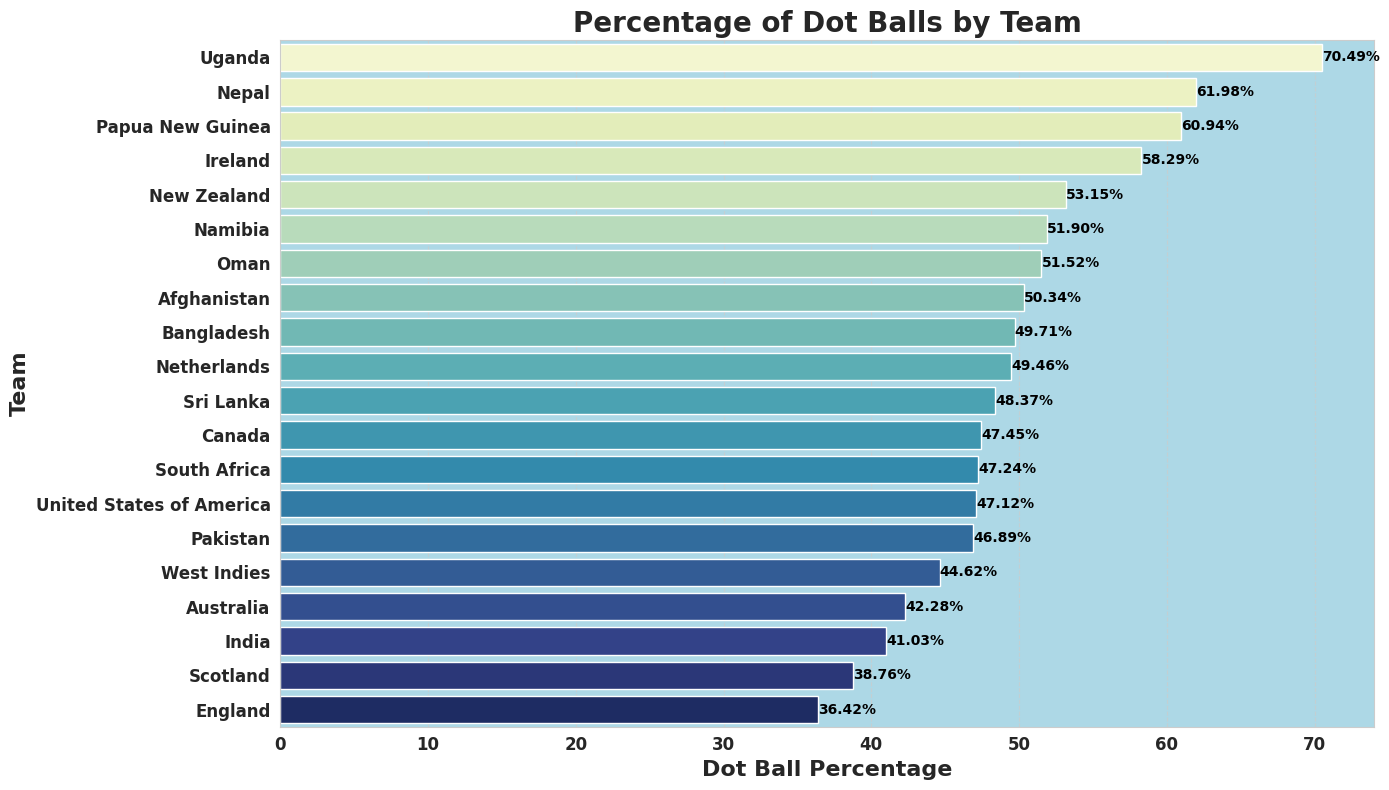

In [179]:
dot_balls = deliveries[deliveries['runs_off_bat'] == 0]
team_dot_balls = dot_balls.groupby('batting_team').size()

dot_ball_percentage = (team_dot_balls / team_balls) * 100

dot_ball_percentage = dot_ball_percentage.reset_index()
dot_ball_percentage.columns = ['batting_team', 'dot_ball_percentage']
dot_ball_percentage = dot_ball_percentage.sort_values(by='dot_ball_percentage', ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=dot_ball_percentage, x='dot_ball_percentage', y='batting_team', palette='YlGnBu')
plt.title('Percentage of Dot Balls by Team', fontsize=20, weight='bold')
plt.xlabel('Dot Ball Percentage', fontsize=16, weight='bold')
plt.ylabel('Team', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(dot_ball_percentage['dot_ball_percentage']):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

#**3.5 Relationship between Strike Rate and Runs Per Over**

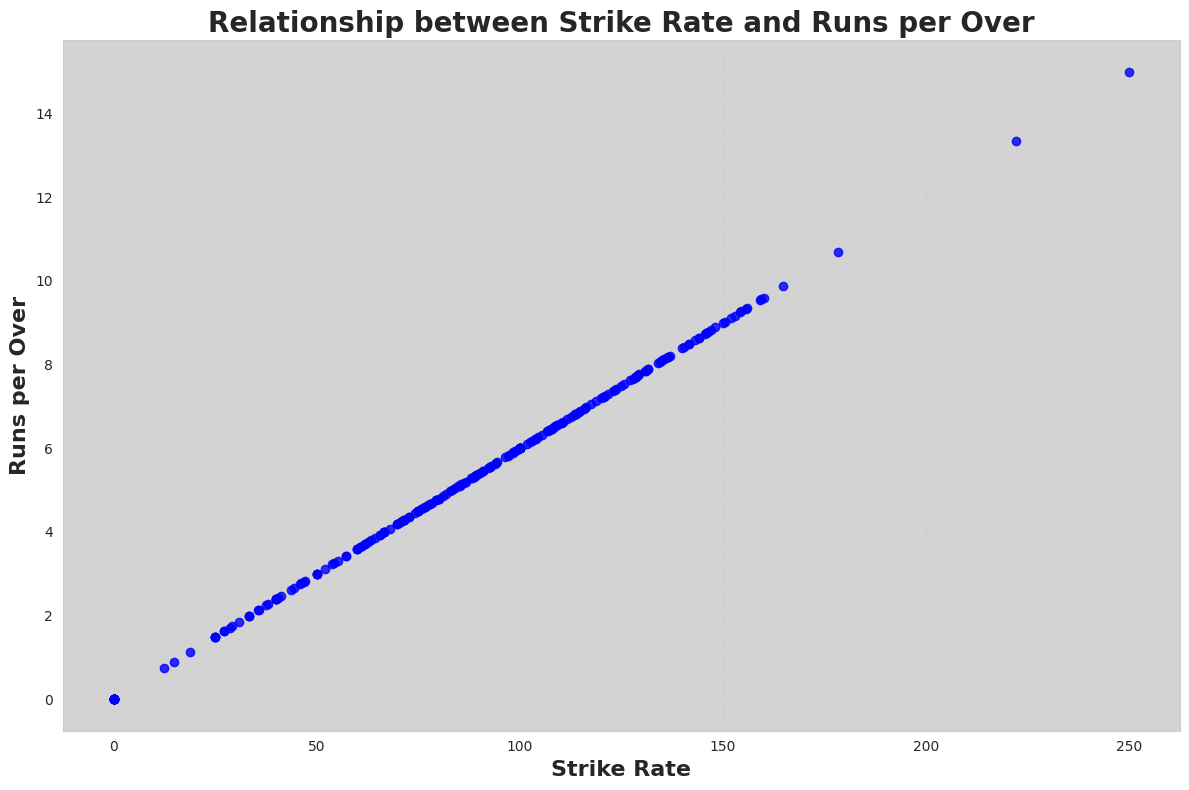

In [180]:
batsman_runs = deliveries.groupby('striker')['runs_off_bat'].sum()
batsman_balls = deliveries.groupby('striker').size()

strike_rate = (batsman_runs / batsman_balls) * 100
batsman_runs_per_over = batsman_runs / (batsman_balls / 6)

strike_rate_runs_per_over = pd.DataFrame({'Strike Rate': strike_rate, 'Runs per Over': batsman_runs_per_over})

plt.figure(figsize=(12, 8))
plt.scatter(strike_rate_runs_per_over['Strike Rate'], strike_rate_runs_per_over['Runs per Over'], alpha=0.8, color='b')
plt.title('Relationship between Strike Rate and Runs per Over', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Runs per Over', fontsize=16, weight='bold')

plt.grid(True, linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightgray')

plt.tight_layout()
plt.show()

#**4. Bowling Analysis**

#**Impact of Dot Balls on Run Rate**

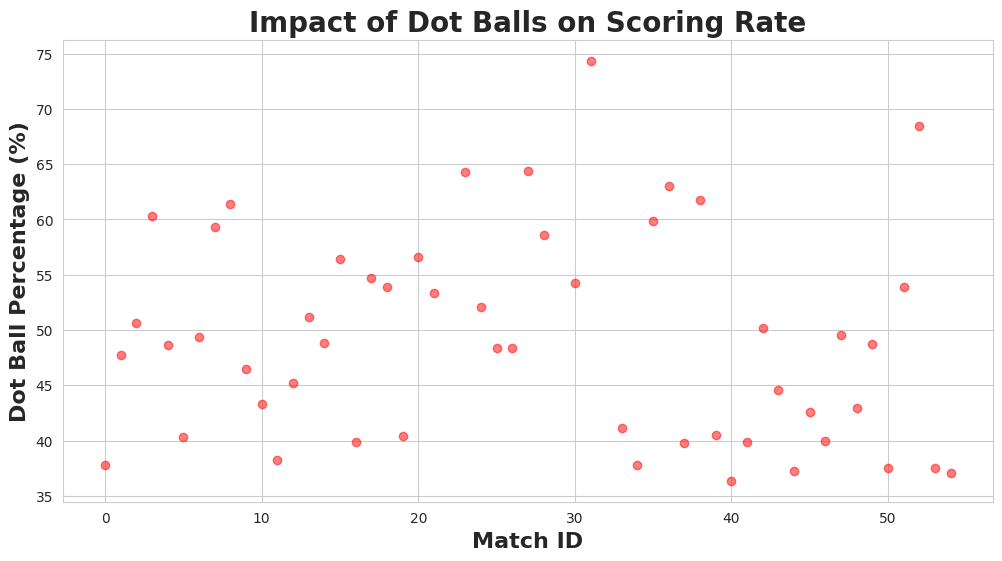

In [181]:
deliveries['is_dot'] = deliveries['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
dot_ball_impact = deliveries.groupby('match_id')['is_dot'].mean()

plt.figure(figsize=(12, 6))
plt.scatter(dot_ball_impact.index, dot_ball_impact * 100, color='red', alpha=0.5)
plt.xlabel('Match ID', fontsize=16, weight='bold')
plt.ylabel('Dot Ball Percentage (%)', fontsize=16, weight='bold')
plt.title('Impact of Dot Balls on Scoring Rate', fontsize=20, weight='bold')
plt.grid(True)
plt.show()